In [1]:
%load_ext autoreload
%autoreload 2
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [3]:
import fastcat.fastcat as fc
import glob

In [6]:
spectra = ['Al_spectrum_6',
           'W_spectrum_6']
scats = []

angles = np.linspace(0,np.pi*2,2)        
phantom = fc.Catphan_515()
s = fc.Spectrum()

for spectrum in spectra:

    s.load(spectrum)
    kernel = fc.Kernel(s, 'CuGOS-784-micrometer')
    scats.append(np.mean(phantom.return_projs(kernel,s,angles,det_on=False,mgy = 0.0)[0],0))

(19, 41, 41) 19
(19, 41, 41) 19


In [7]:
real_spec = np.load('data/w_spec_profile.npy')
real_spec_CT = np.load('/home/xcite/scintillators/Catphan_dose/batch_submission_W/analysis/Readout_0000.phsp.npy')

<IPython.core.display.Javascript object>


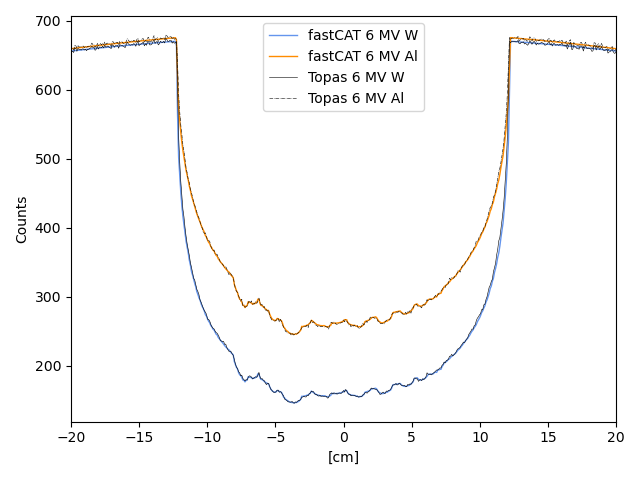

In [8]:
plt.figure()
plt.subplot(111)

dist = np.linspace(-256*0.0784 - 0.0392,256*0.0784 - 0.0392, 512)

# The primary projection don't include any scatter should add the coherent and the incoherent scatter
plt.plot(dist,scats[0],linewidth = 1.0,color = 'cornflowerblue')
plt.plot(dist,scats[1],linewidth = 1.0,color = 'darkorange')

plt.plot(dist,real_spec,'k-',linewidth = 0.4)
plt.plot(dist,np.mean(real_spec_CT,0),'k-.',linewidth = 0.4,markersize=0.4)
plt.xlim([-20,20])

plt.legend(['fastCAT 6 MV W', 'fastCAT 6 MV Al','Topas 6 MV W', 'Topas 6 MV Al'])
plt.xlabel('[cm]')
plt.ylabel('Counts')
plt.tight_layout()

# I'll do the same thing for the 404 phantom

In [9]:
spectra = ['W_spectrum_6']
MV_detectors = ['CuGOS-784-micrometer']
scats = []

angles = np.linspace(np.pi/2,np.pi*2,2)        
phantom = fc.Catphan_404()
s = fc.Spectrum()

for spectrum in spectra:

    s.load(spectrum)
    kernel = fc.Kernel(s, MV_detectors[0])
    scats.append(np.mean(phantom.return_projs(kernel,s,angles,det_on=False,mgy = 0.0)[0],0))

(19, 41, 41) 19


In [10]:
real_spec_CT = np.load('/home/xcite/scintillators/MV_CBCT_exp/analysis/2020-11-18-h14m02/composite.npy')

<IPython.core.display.Javascript object>


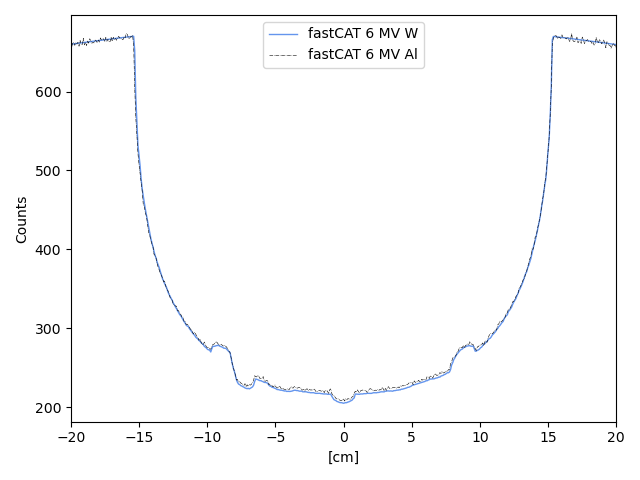

In [11]:
plt.figure()
plt.subplot(111)

dist = np.linspace(-256*0.0784 - 0.0392,256*0.0784 - 0.0392, 512)

# The primary projection don't include any scatter should add the coherent and the incoherent scatter
plt.plot(dist,scats[0][-1::-1],linewidth = 1.0,color = 'cornflowerblue')

plt.plot(dist,np.mean(real_spec_CT,0),'k-.',linewidth = 0.4,markersize=0.4)
plt.xlim([-20,20])

plt.legend(['fastCAT 6 MV W', 'fastCAT 6 MV Al','Topas 6 MV W', 'Topas 6 MV Al'])
plt.xlabel('[cm]')
plt.ylabel('Counts')
plt.tight_layout()

# Now looking at the full thing

In [183]:
spectra = ['W_spectrum_6']
MV_detectors = ['CuGOS-784-micrometer']
scats = []

angles = np.linspace(np.pi/2,np.pi*2,2)        
phantom = fc.Catphan_404()
s = fc.Spectrum()

for spectrum in spectra:

    s.load(spectrum)
    kernel = fc.Kernel(s, MV_detectors[0])
    scats.append(np.mean(phantom.return_projs(kernel,s,angles,mgy = 0.0,test=2)[0],0))

(19, 41, 41) 19
ratio is None number of photons 0.006546651791146009


In [184]:
real_spec_CT = np.load('/home/xcite/scintillators/MV_CBCT_exp/Catphan_404_w_det.npy')
Catphan2 = np.load('/home/xcite/MV_CBCT/projections/Catphan2.npy')

<IPython.core.display.Javascript object>


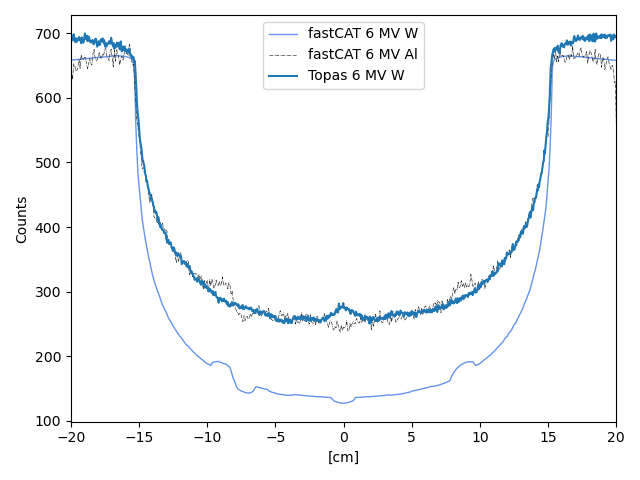

In [185]:
plt.figure()
plt.subplot(111)

dist = np.linspace(-256*0.0784 - 0.0392,256*0.0784 - 0.0392, 512)
dist_long = np.linspace(-256*0.0784 - 0.0392,256*0.0784 - 0.0392, 1024)

# The primary projection don't include any scatter should add the coherent and the incoherent scatter
plt.plot(dist,scats[0][-1::-1],linewidth = 1.0,color = 'cornflowerblue')

plt.plot(dist,14.3*real_spec_CT,'k-.',linewidth = 0.4,markersize=0.4)
plt.xlim([-20,20])
plt.plot(dist_long,Catphan2[0,300]/3)
plt.legend(['fastCAT 6 MV W', 'fastCAT 6 MV Al','Topas 6 MV W', 'Topas 6 MV Al'])
plt.xlabel('[cm]')
plt.ylabel('Counts')
plt.tight_layout()

<IPython.core.display.Javascript object>


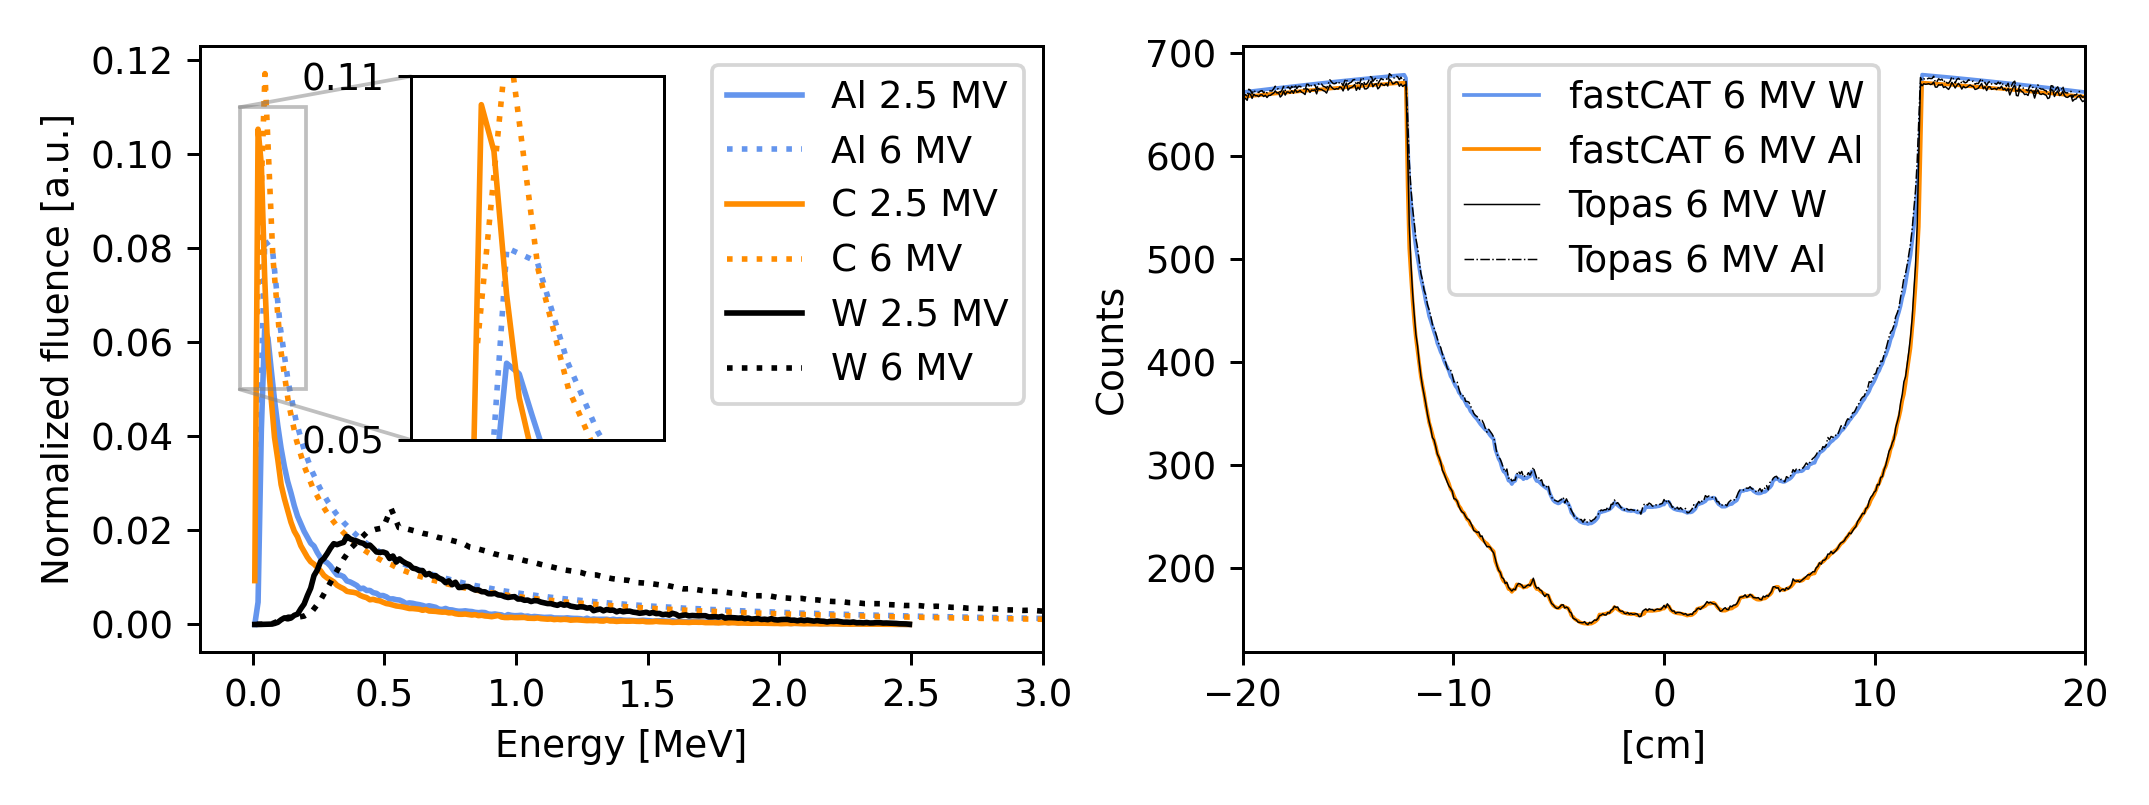

In [94]:
# plt.figure()
# plt.plot(-np.log(mc_noise/flood_summed2))

# plt.figure(dpi=300,figsize=[8,4])
# plt.subplot(121)

files = glob.glob('../xpecgen/data/MV_spectra/*.txt')

fig,ax = plt.subplots(1,2,figsize=[8,3],dpi=300)
names = []

fmt_spec = ['-', ':', '-', ':','-', ':', '-', ':']
colors = ['cornflowerblue','cornflowerblue','darkorange','darkorange','k','k',]

ax2 = ax[0].inset_axes([0.25, 0.35, 0.3, 0.6])
# axin2 = ax.inset_axes(
#         [-0.1, 0.04, 0.4, 0.08], transform=ax.transData)
# axin2.set_xticks([])
# axin2.set_yticks([])

for jj,file in enumerate(sorted(files)):
    
    fluence = []
    energies = []
    
    names.append(file.split('_'))

    with open(file) as f:

        for line in f:
            energies.append(float(line.split()[0]))
            fluence.append(float(line.split()[1]))

    fluence /= np.sum(fluence)
    
    ax[0].plot(energies,fluence,fmt_spec[jj],color=colors[jj])
    ax2.plot(energies,fluence,fmt_spec[jj],color=colors[jj])


    fluence_str = [str(fluenc) for fluenc in fluence]
    energies = [str(energy) for energy in energies]
    with open(file.split('.txt')[0] + 'topas','w') as out:
        out.write(file + '\n \n')
        out.write('dv:So/Example/BeamEnergySpectrumValues = ' + str(len(energies)) +' ' + ' '.join(energies) + '\n')
        out.write('uv:So/Example/BeamEnergySpectrumWeights = ' + str(len(energies)) + ' ' + ' '.join(fluence_str) + '\n \n')
        
labels = []

for ii in range(len(names)):
    
    labels.append(names[ii][1].split('/')[1] + ' 6 MV' if ii % 2 == 1 else names[ii][1].split('/')[1] + ' 2.5 MV')
    
ax[0].legend(labels)
ax[0].set_xlim([-0.2,3])
ax[0].set_xlabel('Energy [MeV]')
ax[0].set_ylabel('Normalized fluence [a.u.]')


ax2.set_xlim([-0.05,0.2])
ax2.set_ylim([0.05,0.11])
ax2.set_xticks([])
ax2.set_yticks([0.05,0.11])

ax[0].indicate_inset_zoom(ax2)

# plt.subplot(122)
# plt.plot(2*mc_noise)

# The primary projection don't include any scatter should add the coherent and the incoherent scatter
ax[1].plot(dist,scats[0],linewidth = 1.0,color = 'cornflowerblue')
ax[1].plot(dist,scats[1],linewidth = 1.0,color = 'darkorange')

# plt.plot(fc_prime_2 + 3*mc_scatter - 2*coh_scatter,'r',linewidth= 0.7)
# plt.plot(fc_prime_2)
# plt.plot(flood_summed2)
ax[1].plot(dist,real_spec,'k-',linewidth = 0.4)
ax[1].plot(dist,np.mean(real_spec_CT,0),'k-.',linewidth = 0.4,markersize=0.4)
ax[1].set_xlim([-20,20])
# plt.plot(dist,real_spec_water_2,'k--',linewidth = 0.7)
# plt.plot(real_spec_water_3*2,'k--',linewidth = 0.7)

ax[1].legend(['fastCAT 6 MV W','fastCAT 6 MV Al','Topas 6 MV W','Topas 6 MV Al'])
ax[1].set_xlabel('[cm]')
ax[1].set_ylabel('Counts')
plt.tight_layout()
# plt.plot(real_spec_water,'k',linewidth= 0.7)
# plt.plot(fc_prime_2 + 2*mc_scatter_e,'r')
# plt.plot(2*mc_noise,'g')
# plt.plot(fc_prime_2,'.')

In [95]:
plt.savefig('/home/xcite/fastcat_paper/figures/one_slice_comparison.pdf')

<IPython.core.display.Javascript object>


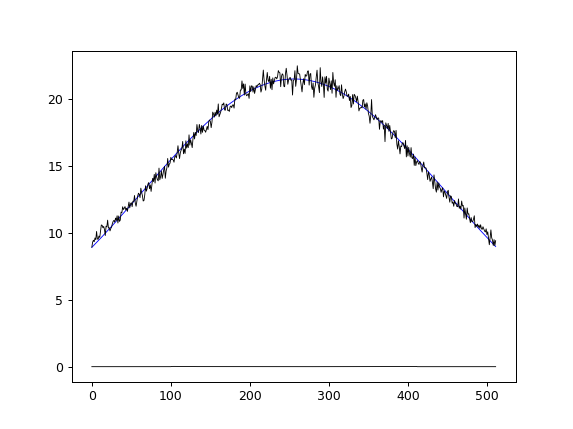

In [17]:
plt.figure()
plt.plot(mc_scatter,'b',linewidth= 0.7)
plt.plot(mc_scatter2,'k',linewidth= 0.7)
plt.plot(coh_scatter,'k',linewidth= 0.7)

<IPython.core.display.Javascript object>


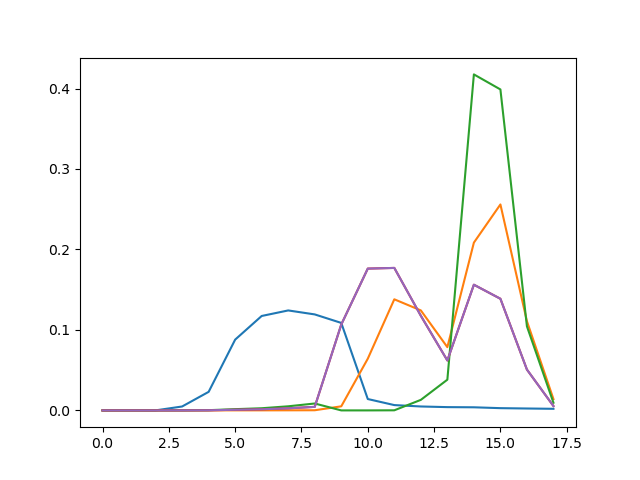

In [91]:
plt.figure()
dep_eff = [0.00000000e+00, 0.00000000e+00, 3.71873657e-05, 4.85904579e-03,
       2.30410791e-02, 8.79657308e-02, 1.17341364e-01, 1.24223022e-01,
       1.19282628e-01, 1.08713848e-01, 1.41254215e-02, 6.60505371e-03,
       4.87490513e-03, 4.06587348e-03, 3.85836743e-03, 2.79186279e-03,
       2.35730273e-03, 1.98059733e-03]
plt.plot(dep_eff)
plt.plot(weights_woutdet)
plt.plot(weights_woutdet2)
plt.plot(weights_wdet)
plt.plot((weights_woutdet*dep_eff)/np.sum((weights_woutdet*dep_eff)))

In [90]:
weights_woutdet2 = phantom.weights_small

In [92]:
deposition = np.load(kernel.deposition_efficiency_file,allow_pickle=True)

<IPython.core.display.Javascript object>


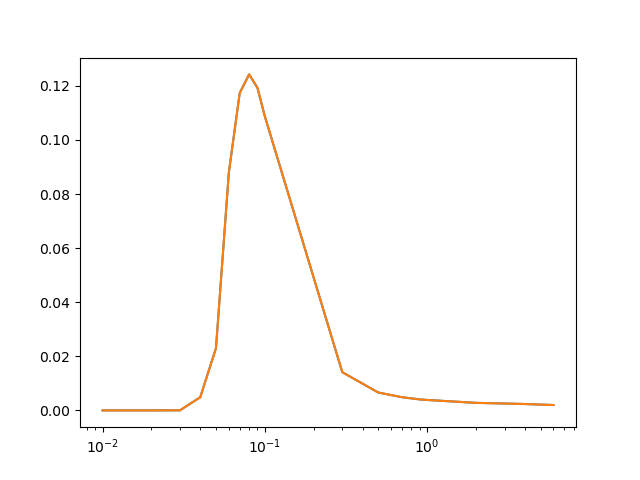

In [102]:
plt.figure()
original_energies_keV = np.array([10,20,30, 40, 50 ,60, 70, 80 ,90 ,100 ,300 ,500 ,700, 900, 1000 ,2000 ,4000 ,6000])
plt.semilogx(original_energies_keV/1000,deposition[0]/(original_energies_keV/1000)/1000000)
plt.semilogx(original_energies_keV/1000,dep_eff)

<IPython.core.display.Javascript object>


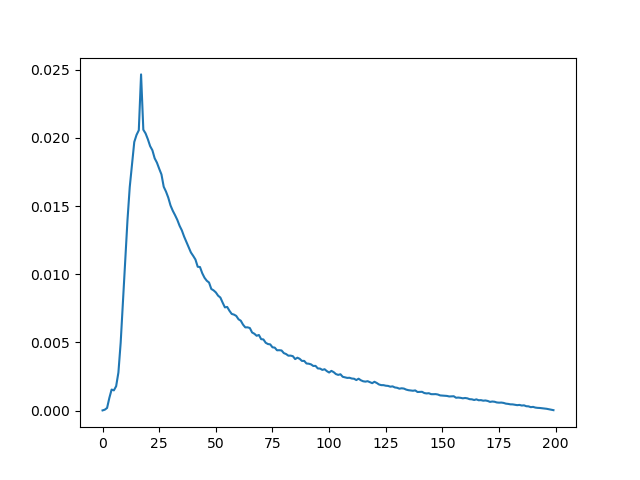

In [103]:
plt.figure()
plt.plot([2.2262865210080333e-05,7.51092193361817e-05,0.00020166596944515869,0.0009358167568905561,0.001548357963127378,0.0014901719949593573,0.0017952322815272112,0.0027990385706452986,0.00498287323864255,0.007984458284023537,0.010987253645955082,0.013957067881883951,0.016386475777989188,0.018058830671721118,0.019692152856697585,0.020213194131712308,0.020552082765868226,0.02464658365640205,0.020591418053761322,0.020318491671610754,0.01989306540409002,0.01939048145647129,0.019086086844006242,0.01849999105439909,0.018179257168501523,0.017733558098758963,0.01731539373054157,0.016410682109000325,0.01605908515106356,0.015619135084936148,0.015042721827733446,0.014651789581903584,0.014331358275143658,0.013983089687720924,0.013552519574860325,0.013215143836392603,0.012760367392520866,0.012375789308581428,0.012011181447726177,0.01159574029174754,0.011348533136296302,0.011078935124659763,0.01054972421292878,0.010528846252431676,0.010076187862523412,0.009743955969395557,0.00952458609460713,0.00939356932800935,0.0089209407150169,0.008820181862183042,0.008669497451638714,0.00842924961635318,0.008292786425277896,0.007920311506844024,0.007572950656834209,0.007605024045423966,0.007324835763970055,0.007093967881951336,0.007042832007690309,0.006948729895884513,0.006701522740433277,0.006595620042259553,0.006307867282364662,0.006105744418421668,0.006109677947210977,0.006060054968638147,0.005733269499987797,0.005640377704732559,0.0054918113481517055,0.005548998805165517,0.00524430161356283,0.005222818494790446,0.004979544868128519,0.004885140177185085,0.004860933846173947,0.0046464052375877465,0.004622198906576609,0.004426430204524039,0.004433994682965019,0.004414629618156109,0.004221584128342292,0.004152596084960551,0.004033077325593062,0.004037010854382373,0.003995254933388161,0.0037828443787654336,0.003884510969012209,0.0038034197601249002,0.003647591504240706,0.003650617295617098,0.0034605975971796726,0.0034436531654718767,0.00339645082000016,0.003279050114596145,0.0032857068556242076,0.0030981077902878964,0.003087517520470524,0.002990480391029628,0.00303910485844825,0.0029012195454260607,0.0027991293443865905,0.0029186783616678433,0.0028262404351190634,0.002683634887549703,0.002625297629812863,0.002670139858010994,0.0024855968419648386,0.002440845387507999,0.0024040215064573068,0.00241361326512047,0.00235821102501873,0.002341690204103629,0.0022465895811436248,0.0023445949638249653,0.002231067271382733,0.0021581456992116827,0.0021310043505654453,0.0021619884542597007,0.002091094162310833,0.002019261875035284,0.002119324795852572,0.002033785673641966,0.0019230417092660147,0.0018745685314162128,0.0018725109932802662,0.001831814099267792,0.0018171692690060544,0.0017617670289043145,0.0017831593739354068,0.0017045190560629755,0.001680161435483019,0.0016151069208905882,0.001643246780691035,0.0016219754673149984,0.0015470266149217654,0.001503424961187955,0.0014800053359346798,0.0014615782664524517,0.0014878421355995354,0.001371228135953383,0.0013790346777044745,0.0013848744550609114,0.0012945545824756064,0.0012654162115209504,0.0012817857428672316,0.0012128279573992552,0.0012099837135054468,0.0012158234908618835,0.0011856866087530179,0.0011205413204192953,0.0011079540282935042,0.0010943682250135033,0.001082658412386866,0.0010438375090277552,0.001049647028470428,0.0010593295608748827,0.0009495841076531403,0.0009641381641735865,0.0009436838144691758,0.0009077374129176372,0.00093206477558383,0.0009058009064367463,0.0008445891468923337,0.0008338778454199055,0.0007853441517425759,0.000831003343612333,0.000764920059951929,0.0007746025923563839,0.0007347831778430635,0.0007493372343635096,0.0007143590860524166,0.0006463695538248856,0.0006735411603848868,0.0006560823441431043,0.0006045531170031465,0.0005890005493284909,0.0005957783220116093,0.0005705432219324989,0.0005180457415520956,0.0004995884141561036,0.00046654677232590167,0.0004626435014503558,0.0004344733837361451,0.00040627300810817057,0.0004247605934179264,0.00037907114363440534,0.0003936554580686154,0.0003285404276486569,0.0003187973794166742,0.0002595221263531525,0.00027994319235242294,0.00022939734740979253,0.00020801105396145298,0.00019926046530092695,0.00017981975570760756,0.0001555226509551788,0.00013997310907189967,0.00010594808504437024,7.387469645461371e-05,3.9852698218460666e-05])

(19, 41, 41) 19
[0.00000000e+00 1.97676735e-04 4.59538275e-03 1.87763403e-02
 2.69218011e-02 2.19212151e-02 2.16033405e-02 2.61904166e-02
 3.32862718e-02 3.19644957e-02 2.81112167e-02 3.27392041e-02
 3.49504830e-02 3.46741088e-02 3.36192686e-02 3.02069999e-02
 2.63395066e-02 2.97071624e-02 2.38111659e-02 2.25007260e-02
 2.10556003e-02 1.95742454e-02 1.83324695e-02 1.69440891e-02
 1.62341136e-02 1.54300915e-02 1.46698057e-02 1.35275988e-02
 1.28700969e-02 1.21599095e-02 1.14506187e-02 1.09809591e-02
 1.05724920e-02 1.01646457e-02 9.76984695e-03 9.44686642e-03
 9.04474348e-03 8.69744479e-03 8.36870305e-03 8.00925220e-03
 7.77000158e-03 7.51854020e-03 7.09571857e-03 7.01812092e-03
 6.65557358e-03 6.37730877e-03 6.17624050e-03 6.03458005e-03
 5.67710643e-03 5.55974435e-03 5.41242980e-03 5.21155994e-03
 5.07713105e-03 4.80127970e-03 4.54499759e-03 4.51834069e-03
 4.30765877e-03 4.12906655e-03 4.05679017e-03 3.96064121e-03
 3.77928558e-03 3.67974928e-03 3.48113359e-03 3.33273164e-03
 3.29799

<IPython.core.display.Javascript object>


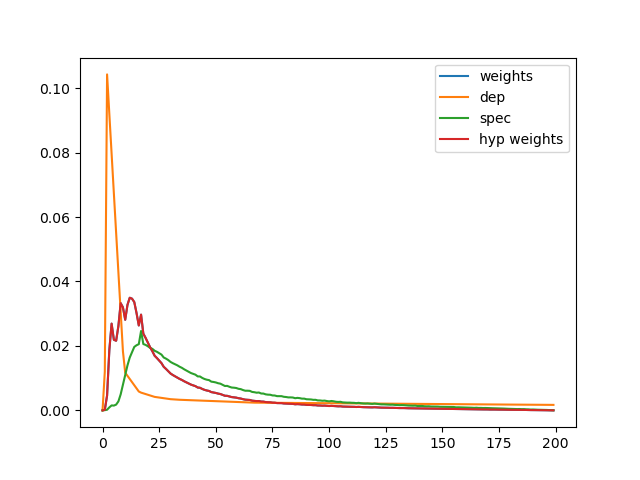

In [149]:
spectra = ['W_spectrum_6']
MV_detectors = ['CuGOS-784-micrometer']
scats = []

angles = np.linspace(np.pi/2,np.pi*2,2)        
phantom = fc.Catphan_404()
s = fc.Spectrum()

for spectrum in spectra:

    s.load(spectrum)
    kernel = fc.Kernel(s, MV_detectors[0])

plt.figure()
plt.plot(kernel.weights/np.sum(kernel.weights),label='weights')
plt.plot(kernel.deposition_interpolated/np.sum(kernel.deposition_interpolated),label='dep')
plt.plot(kernel.fluence,label='spec')
ww = kernel.fluence*kernel.deposition_interpolated
plt.plot(ww/np.sum(ww),label='hyp weights')
plt.legend()

<IPython.core.display.Javascript object>


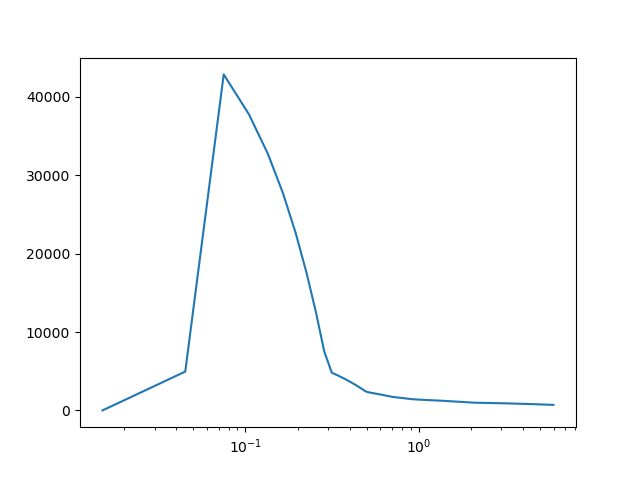

In [153]:
plt.figure()
plt.semilogx(s.x/1000,kernel.deposition_interpolated)